# Proof of concept

In [ ]:
import os
import numpy 
import isambard_dev
import pandas
import seaborn
import MDAnalysis as mda
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D  
%matplotlib notebook

In [ ]:
wd = '/projects/s21/ba13026/Wza_Modeling/L-structures/rosetta/bg_test/md_relax/'

# Tests

## Comparison $R_g$ calculation

`isambard` implementation

In [ ]:
mutant = 'cWza-K375C'
C = 'conformation0'
model_dir = mutant+'/'+C 
model_name = 'refined1_0001_INPUT_0900_ignorechain'
model_pdb = path0 +model_dir+'/'+model_name+'/'+model_name+'.pdb'

In [ ]:
model_pdb

In [ ]:
p = isambard_dev.ampal.convert_pdb_to_ampal(model_pdb)
p.radius_of_gyration

`MDAnalysis` implementation

In [ ]:
u = mda.Universe(model_pdb)
protein = u.select_atoms("protein")
protein.radius_of_gyration()

<b><span style="color:red"> NOTE </span></b>

* `isambard` does not have a way to compute the components of $R_g$

# Radius of gyration  components

Proof of concept

In [8]:
u = mda.Universe(model_pdb)
protein = u.select_atoms("protein")
protein_mass = numpy.sum(protein.masses)
protein_inertia = protein.moment_of_inertia() # tensor of inertia

Reference: Moment of Inertia

https://en.wikipedia.org/wiki/Moment_of_inertia#Inertia_tensor

https://www.mdanalysis.org/MDAnalysisTutorial/atomgroups.html

In [11]:
protein_inertia

array([[  7.90036173e+06,   2.87007467e+02,  -4.27859473e+03],
       [  2.87007467e+02,   7.90061300e+06,   2.80542764e+03],
       [ -4.27859473e+03,   2.80542764e+03,   7.85873515e+06]])

In [9]:
protein_Rg_n = [numpy.sqrt(protein_inertia[i][i]/float(protein_mass)) for i,j in []]

In [10]:
protein_Rg_n

[16.51833476161525, 16.518597439925461, 16.47476018050266]

Implementation

In [ ]:
import MDAnalysis as mda

def get_Rg_components(model_pdb):
    u = mda.Universe(model_pdb)
    protein = u.select_atoms("protein")
    protein_mass = numpy.sum(protein.masses)
    protein_inertia = protein.moment_of_inertia() # tensor of inertia
    f = lambda x : numpy.sqrt(x/float(protein_mass))
    protein_Rg_n = [f(protein_inertia[i][i]) for i in range(3)]
    Rg_x, Rg_y, Rg_z = protein_Rg_n
    return Rg_x, Rg_y, Rg_z

In [ ]:
get_Rg_components(model_pdb)

# Docked structures

## Conformational Groups: All models

### Scatter dataplots

In [ ]:
MUTANTS = ['cWza','cWza-K375C','cWza-S355C','cWza-Y373C']

CONFORMATIONS = {
    'cWza':['conformation0', 'conformation1'],
    'cWza-K375C':['conformation0', 'conformation1'],
    'cWza-S355C':['conformation0', 'conformation1'],
    'cWza-Y373C':['conformation1'],
}

fig, ax = plt.subplots(2,2,figsize=(10,10))
seaborn.set_style('white')

axes = {
    'cWza':ax[0,0],
    'cWza-K375C':ax[0,1],
    'cWza-S355C':ax[1,0],
    'cWza-Y373C':ax[1,1]
}

COLORS = {
    'conformation0':'blue',
    'conformation1':'green'
}

for i in range(len(MUTANTS)):
    mutant = MUTANTS[i]
    for C in CONFORMATIONS[mutant]:
        X = []
        Z = []
        mutant_dir = mutant+'/'+C 
        for model_dir in [mutant_dir+'/'+model for model in os.listdir(wd+mutant_dir)]:
            model_name = model_dir.split('/')[-1]
            model_pdb = wd+'/'+model_dir+'/'+model_name+'.pdb'
            Rg_x, Rg_y, Rg_z = get_Rg_components(model_pdb)
            X.append(Rg_x)
            Z.append(Rg_z)
        seaborn.scatterplot(X,Z,color=COLORS[C],ax=axes[mutant])

plt.show()

### Density dataplots

In [ ]:
MUTANTS = ['cWza','cWza-K375C','cWza-S355C','cWza-Y373C']

CONFORMATIONS = {
    'cWza':['conformation0', 'conformation1'],
    'cWza-K375C':['conformation0', 'conformation1'],
    'cWza-S355C':['conformation0', 'conformation1'],
    'cWza-Y373C':['conformation1'],
}

fig, ax = plt.subplots(2,2,figsize=(10,10))
seaborn.set_style('darkgrid')

axes = {
    'cWza':ax[0,0],
    'cWza-K375C':ax[0,1],
    'cWza-S355C':ax[1,0],
    'cWza-Y373C':ax[1,1]
}

CMAPS = {
    'conformation0':'Blues',
    'conformation1':'Greens'
}

for i in range(len(MUTANTS)):
    mutant = MUTANTS[i]
    for C in CONFORMATIONS[mutant]:
        X = []
        Z = []
        mutant_dir = mutant+'/'+C 
        for model_dir in [mutant_dir+'/'+model for model in os.listdir(wd+mutant_dir)]:
            model_name = model_dir.split('/')[-1]
            model_pdb = wd+'/'+model_dir+'/'+model_name+'.pdb'
            Rg_x, Rg_y, Rg_z = get_Rg_components(model_pdb)
            X.append(Rg_x)
            Z.append(Rg_z)
        seaborn.kdeplot(X,Z,n_levels=20,cmap=CMAPS[C],ax=axes[mutant])

plt.show()

## Conformational Groups: Sample models

In [ ]:
import json

with open(wd+'EMMD_Sample.json','r') as fp:
    Sample = json.load(fp)

In [ ]:
MyTags  = [
    ['cWza', 'conformation0'],
    ['cWza', 'conformation1'],
    ['cWza-K375C', 'conformation0'],
    ['cWza-K375C', 'conformation1'],
    ['cWza-S355C', 'conformation0'],
    ['cWza-S355C', 'conformation1'],
    ['cWza-Y373C', 'conformation1']
]

CONFORMATIONS = {
    'cWza':['conformation0', 'conformation1'],
    'cWza-K375C':['conformation0', 'conformation1'],
    'cWza-S355C':['conformation0', 'conformation1'],
    'cWza-Y373C':['conformation1'],
}

fig, ax = plt.subplots(2,2,figsize=(10,10))
seaborn.set_style('darkgrid')

axes = {
    'cWza':ax[0,0],
    'cWza-K375C':ax[0,1],
    'cWza-S355C':ax[1,0],
    'cWza-Y373C':ax[1,1]
}

CMAPS = {
    'conformation0':'Blues',
    'conformation1':'Greens'
}

for tag in MyTags:
    mutant, C = tag
    X = []; Z = []
    for i in range(len(Sample)):
        model_dir = Sample[i]
        mutant_sample, C_sample, model_name = model_dir.split('/')
        comparison = [mutant_sample, C_sample] == tag
        if comparison:
            model_pdb = wd+model_dir+'/'+model_name+'.pdb'
            Rg_x, Rg_y, Rg_z = get_Rg_components(model_pdb)
            X.append(Rg_x)
            Z.append(Rg_z)
    seaborn.kdeplot(X,Z,n_levels=20,cmap=CMAPS[C],ax=axes[mutant])

plt.show()

### Scatter dataplots

### Density plots

# MD trajectories for docked structures

## Proof of concept

In [ ]:
import os

In [ ]:
mutant = 'cWza-K375C'
C = 'conformation0'
model_dir = mutant+'/'+C 
model_name = 'refined1_0001_INPUT_0900_ignorechain'

name = "md_100ns"
tpr_path = wd + model_dir+ '/' +model_name+'/complex/mdf/'+ name + ".tpr"
xtc_path = wd + model_dir+ '/' +model_name+'/complex/mdf/'+ name + ".xtc"

In [ ]:
if all(map(os.path.isfile, [tpr_path,xtc_path])):
    u = mda.Universe(tpr_path, xtc_path, in_memory=True)
    print("Trajectory loaded and ready to analyse!")
else:
    print("MD traj not available")

In [ ]:
u.trajectory.dt # Time-step (ps)

In [ ]:
u.trajectory.n_frames

In [ ]:
protein = u.select_atoms("protein", updating=True)

In [ ]:
data = []
for ts in u.trajectory[:-1:10]:
    protein_mass = numpy.sum(protein.masses)
    protein_inertia = protein.moment_of_inertia() # tensor of inertia
    protein_mass = numpy.sum(protein.masses)
    protein_inertia = protein.moment_of_inertia() # tensor of inertia
    f = lambda x : numpy.sqrt(x/float(protein_mass))
    protein_Rg_n = [f(protein_inertia[i][i]) for i in range(3)]
    Rg_x, Rg_y, Rg_z = protein_Rg_n
    data.append([Rg_x, Rg_z])
    print(Rg_x, Rg_y, Rg_z)

In [ ]:
df = pandas.DataFrame(data)

In [ ]:
seaborn.scatterplot(df[0],df[1])

## Implementation

In [ ]:
import os
import MDAnalysis as mda

def is_traj_available(dir_path, md_name):
    """Check whether all trajectory files are available
    This indicates whether simulations has finished successfully too"""
    gro_path = dir_path + name + ".gro"
    tpr_path = dir_path + name + ".tpr"
    xtc_path = dir_path + name + ".xtc"
    test_files = [gro_path, tpr_path, xtc_path]
    if all(map(os.path.isfile, test_files)):
        return True

def get_Rg_components_traj(dir_path, md_name):
    if is_traj_available(dir_path, md_name):
        tpr_path = dir_path + name + ".tpr"
        xtc_path = dir_path + name + ".xtc"
        u = mda.Universe(tpr_path, xtc_path, in_memory=True)
        n_frames = u.trajectory.n_frames
        dt = u.trajectory.dt
        mssg = "Loaded "+str(n_frames)+" frames with timestep "+str(dt)
#         print(mssg)
    else:
        print("MD traj files (.tpr/.xtc) not available")
    try:
        protein = u.select_atoms("protein", updating=True)
        data = []
        for ts in u.trajectory:
            protein_mass = numpy.sum(protein.masses)
            protein_inertia = protein.moment_of_inertia() # tensor of inertia
            protein_mass = numpy.sum(protein.masses)
            protein_inertia = protein.moment_of_inertia() # tensor of inertia
            f = lambda x : numpy.sqrt(x/float(protein_mass))
            protein_Rg_n = [f(protein_inertia[i][i]) for i in range(3)]
            Rg_x, Rg_y, Rg_z = protein_Rg_n
            data.append([Rg_x, Rg_y, Rg_z])
        return data
    except:
        return []
    try:
        u.close()
    except:
        pass

In [ ]:
mutant = 'cWza-K375C'
C = 'conformation0'
model_dir = mutant+'/'+C 
model_name = 'refined1_0001_INPUT_0900_ignorechain'

name = "md_100ns"
dir_path = wd + model_dir+ '/' +model_name+'/complex/mdf/'

In [ ]:
is_traj_available(dir_path, name)

In [ ]:
Rg_traj = get_Rg_components_traj(dir_path, name)

In [ ]:
Rg_traj = numpy.array(Rg_traj)

In [ ]:
fig,ax = plt.subplots(1,1)
Rg_x, Rg_y, Rg_z = Rg_traj.T

seaborn.scatterplot(Rg_x[:100], Rg_z[:100],color='black',ax=ax)
seaborn.scatterplot(Rg_x[-100:], Rg_z[-100:],color='red',ax=ax)

plt.show()

## Alternative Implementation

### Proof of concept

In [18]:
path0 = wd+"cWza/conformation0/refined1_0001_INPUT_0908_ignorechain/complex/mdf/md_100ns/"

In [19]:
!ls $path0

Protein_0.pdb	 Protein_28.pdb  Protein_47.pdb  Protein_66.pdb  Protein_85.pdb
Protein_100.pdb  Protein_29.pdb  Protein_48.pdb  Protein_67.pdb  Protein_86.pdb
Protein_10.pdb	 Protein_2.pdb	 Protein_49.pdb  Protein_68.pdb  Protein_87.pdb
Protein_11.pdb	 Protein_30.pdb  Protein_4.pdb	 Protein_69.pdb  Protein_88.pdb
Protein_12.pdb	 Protein_31.pdb  Protein_50.pdb  Protein_6.pdb	 Protein_89.pdb
Protein_13.pdb	 Protein_32.pdb  Protein_51.pdb  Protein_70.pdb  Protein_8.pdb
Protein_14.pdb	 Protein_33.pdb  Protein_52.pdb  Protein_71.pdb  Protein_90.pdb
Protein_15.pdb	 Protein_34.pdb  Protein_53.pdb  Protein_72.pdb  Protein_91.pdb
Protein_16.pdb	 Protein_35.pdb  Protein_54.pdb  Protein_73.pdb  Protein_92.pdb
Protein_17.pdb	 Protein_36.pdb  Protein_55.pdb  Protein_74.pdb  Protein_93.pdb
Protein_18.pdb	 Protein_37.pdb  Protein_56.pdb  Protein_75.pdb  Protein_94.pdb
Protein_19.pdb	 Protein_38.pdb  Protein_57.pdb  Protein_76.pdb  Protein_95.pdb
Protein_1.pdb	 Protein_39.pdb  Protein_58.pdb  Protein_7

In [ ]:
# Compute directory size
import os
size_frames = sum(os.path.getsize(path0+f) for f in os.listdir(path0) if os.path.isfile(path0+f))

In [ ]:
import json
with open(wd+'EMMD_Sample.json','r') as fp:
    Sample = json.load(fp)

In [ ]:
# Size of all 100 frames in GBs
len(Sample)*size_frames/1e9

**Advantages**:

* Can be parallelised _unlinke_ MD trajectory analysis (u.trajectory)
* Overall time per trajectory 15 secs (9 secs traj loading + 6 secs data analysis)

**Caveats**:

* Requires frame extraction, which requires time. However, already paralelised (Use  `~/mpmodeling/tools/protein_frame_extractor.py`)
* Increased storage 

Serial implementation

In [20]:
for i in range(100):
    model_pdb = path0+'Protein_'+str(i)+'.pdb'
    Rg_components = get_Rg_components(model_pdb)
    print(Rg_components)

(15.654014093578285, 15.63670754993408, 17.317092274771753)
(16.78815928763035, 16.458984032420059, 18.012590864633488)
(16.915484527086861, 16.308022870321775, 18.042912640501257)
(16.765047530072223, 16.515053913590044, 18.25294237516465)
(16.77188965636698, 16.571444950875101, 18.303918606592742)
(17.055948492306296, 16.474080798279051, 18.300756010784621)
(17.026648507545683, 16.512725397179075, 18.149351578495807)
(17.412472819314338, 16.366423736843377, 18.427779486269309)
(17.22319245813134, 16.450840068406901, 18.367149654277377)
(17.150198838821876, 16.347288775788229, 18.217035823047961)
(17.130220753673324, 16.691546506643157, 18.342147667306449)
(17.253998208578185, 16.589127041224643, 18.491464308661435)
(17.278207125307851, 16.444529529459093, 18.460595221300061)
(17.436894413301232, 16.421302337765468, 18.601491211951632)
(17.413132441610312, 16.370804152656198, 18.447971623348288)
(17.423280628618119, 16.410759307444245, 18.562735163436134)
(17.373304090366009, 16.58113

Parallel implementation

In [21]:
func = get_Rg_components

param_list = []
for i in range(100):
    model_pdb = path0+'Protein_'+str(i)+'.pdb'
    param_list.append(model_pdb)

import concurrent.futures     
n_threads = 10

data = []

with concurrent.futures.ProcessPoolExecutor(max_workers = n_threads) as executor:
    out = executor.map(func, param_list)
    data.append(out)

output = list(data[0])

output

[(15.654014093578285, 15.63670754993408, 17.317092274771753),
 (16.78815928763035, 16.458984032420059, 18.012590864633488),
 (16.915484527086861, 16.308022870321775, 18.042912640501257),
 (16.765047530072223, 16.515053913590044, 18.25294237516465),
 (16.77188965636698, 16.571444950875101, 18.303918606592742),
 (17.055948492306296, 16.474080798279051, 18.300756010784621),
 (17.026648507545683, 16.512725397179075, 18.149351578495807),
 (17.412472819314338, 16.366423736843377, 18.427779486269309),
 (17.22319245813134, 16.450840068406901, 18.367149654277377),
 (17.150198838821876, 16.347288775788229, 18.217035823047961),
 (17.130220753673324, 16.691546506643157, 18.342147667306449),
 (17.253998208578185, 16.589127041224643, 18.491464308661435),
 (17.278207125307851, 16.444529529459093, 18.460595221300061),
 (17.436894413301232, 16.421302337765468, 18.601491211951632),
 (17.413132441610312, 16.370804152656198, 18.447971623348288),
 (17.423280628618119, 16.410759307444245, 18.562735163436134

## Sample completeness

In [ ]:
import json

with open(wd+'EMMD_Sample.json','r') as fp:
    Sample = json.load(fp)

In [ ]:
md_name = 'md_100ns'
for i in range(len(Sample)):
    model_dir = Sample[i]
    dir_path = wd+model_dir+'/complex/mdf/'
    print(model_dir, is_traj_available(dir_path, md_name))

## First 10 ns

Serial implementation

In [ ]:
MyTags  = [
    ['cWza', 'conformation0'],
    ['cWza', 'conformation1'],
    ['cWza-K375C', 'conformation0'],
    ['cWza-K375C', 'conformation1'],
    ['cWza-S355C', 'conformation0'],
    ['cWza-S355C', 'conformation1'],
    ['cWza-Y373C', 'conformation1']
]

CONFORMATIONS = {
    'cWza':['conformation0', 'conformation1'],
    'cWza-K375C':['conformation0', 'conformation1'],
    'cWza-S355C':['conformation0', 'conformation1'],
    'cWza-Y373C':['conformation1'],
}

fig, ax = plt.subplots(2,2,figsize=(10,10))
seaborn.set_style('darkgrid')

axes = {
    'cWza':ax[0,0],
    'cWza-K375C':ax[0,1],
    'cWza-S355C':ax[1,0],
    'cWza-Y373C':ax[1,1]
}

CMAPS = {
    'conformation0':'Blues',
    'conformation1':'Greens'
}

name = 'md_100ns'
for tag in MyTags:
    data = []
    mutant, C = tag
    for i in range(2):
        model_dir = Sample[i]
        mutant_sample, C_sample, model_name = model_dir.split('/')
        comparison = [mutant_sample, C_sample] == tag
        if comparison:
            dir_path = wd+model_dir+'/complex/mdf/'
            Rg_traj = get_Rg_components_traj(dir_path, name)
            data = data + Rg_traj[:100]
    data = numpy.array(data)
    try:
        Rg_x, Rg_y, Rg_z = data.T
        seaborn.scatterplot(Rg_x, Rg_z,color='black',ax=axes[mutant])
    except:
        pass
    
#     seaborn.kdeplot(X,Z,n_levels=20,cmap=CMAPS[C],ax=axes[mutant])

plt.show()

Parallel implementation

In [ ]:
import concurrent.futures     
n_threads = 4

data = []

with concurrent.futures.ThreadPoolExecutor(max_workers = n_threads) as executor:
    out = executor.map(func, param_list)
    data.append(out)

In [ ]:
def func(dir_path):
    name = 'md_100ns'
    data = get_Rg_components_traj(dir_path, name)
    return data

In [ ]:
n_cores = 20
DATA = {}

for tag in MyTags:
    data = []
    param_list = []
    mutant, C = tag
    for i in range(100):
        model_dir = Sample[i]
        mutant_sample, C_sample, model_name = model_dir.split('/')
        comparison = [mutant_sample, C_sample] == tag
        if comparison:
            dir_path = wd+model_dir+'/complex/mdf/'
            param_list.append( dir_path )
    print(len(param_list))
    with concurrent.futures.ProcessPoolExecutor(max_workers = n_cores) as executor:
        out = executor.map(func, param_list)
        data.append(out)
    
    DATA[json.dumps(tag)] = list(data)

In [ ]:
DATA

In [ ]:
[list(DATA[k][0]) for k in DATA.keys()]

In [ ]:
MyTags  = [
    ['cWza', 'conformation0'],
    ['cWza', 'conformation1'],
    ['cWza-K375C', 'conformation0'],
    ['cWza-K375C', 'conformation1'],
    ['cWza-S355C', 'conformation0'],
    ['cWza-S355C', 'conformation1'],
    ['cWza-Y373C', 'conformation1']
]

DATA = {}
name = 'md_100ns'

for tag in MyTags:
    data = []
    mutant, C = tag
    for i in range(len(Sample)):
        model_dir = Sample[i]
        mutant_sample, C_sample, model_name = model_dir.split('/')
        comparison = [mutant_sample, C_sample] == tag
        if comparison:
            dir_path = wd+model_dir+'/complex/mdf/'
            Rg_traj = get_Rg_components_traj(dir_path, name)
            data = data + Rg_traj[:100]
    DATA[json.dumps(tag)] = data

In [ ]:
import concurrent.futures     

In [ ]:
import concurrent.futures     
n_threads = 4

data = []

with concurrent.futures.ThreadPoolExecutor(max_workers = n_threads) as executor:
    out = executor.map(func, param_list)
    data.append(out)

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.animation as animation

fig, ax = plt.subplots()

x = np.arange(0, 2*np.pi, 0.01)
line, = ax.plot(x, np.sin(x))


def init():  # only required for blitting to give a clean slate.
    line.set_ydata([np.nan] * len(x))
    return line,


def animate(i):
    line.set_ydata(np.sin(x + i / 100))  # update the data.
    return line,


ani = animation.FuncAnimation(
    fig, animate, init_func=init, interval=2, blit=True, save_count=50)

# To save the animation, use e.g.
#
# ani.save("movie.mp4")
#
# or
#
# from matplotlib.animation import FFMpegWriter
# writer = FFMpegWriter(fps=15, metadata=dict(artist='Me'), bitrate=1800)
# ani.save("movie.mp4", writer=writer)

plt.show()

## Last 10 ns

# HOLE metrics

* HOLE wrapper implemented with `MDAnalysis`
* Needs HOLE to be compiled and located in `~/hole2/exe/hole`, although can be modified.

https://www.mdanalysis.org/docs/documentation_pages/analysis/hole.html

## Single PDB

In [ ]:
%matplotlib notebook

In [ ]:
from MDAnalysis.analysis.hole import HOLE
from MDAnalysis.tests.datafiles import PDB_HOLE

Test model

In [ ]:
H = HOLE(PDB_HOLE, executable="~/hole2/exe/hole")  # set path to your hole binary
H.run()
H.collect()
H.plot(linewidth=3, color="black", label=False)

In [ ]:
H.min_radius()[0][-1]

Docked model

In [ ]:
wd = '/projects/s21/ba13026/Wza_Modeling/L-structures/rosetta/bg_test/md_relax/'

In [ ]:
mutant = 'cWza-K375C'
C = 'conformation0'
model_dir = mutant+'/'+C 
model_name = 'refined1_0001_INPUT_0900_ignorechain'
model_pdb = wd +model_dir+'/'+model_name+'/'+model_name+'.pdb'

In [ ]:
H = HOLE(model_pdb, executable="~/hole2/exe/hole")  # set path to your hole binary
H.run()
H.collect()
H.plot(linewidth=3, color="black", label=False)

In [ ]:
H.min_radius()[0][-1]

## MD trajectory

Test model

In [ ]:
import MDAnalysis as mda
from MDAnalysis.analysis.hole import HOLEtraj
from MDAnalysis.tests.datafiles import MULTIPDB_HOLE

u = mda.Universe(MULTIPDB_HOLE)
H = HOLEtraj(u, executable="~/hole2/exe/hole")
H.run()
H.plot3D()

Docked model

In [ ]:
import MDAnalysis as mda

In [ ]:
mutant = 'cWza-K375C'
C = 'conformation0'
model_dir = mutant+'/'+C 
model_name = 'refined1_0001_INPUT_0900_ignorechain'

name = "md_100ns"
tpr_path = wd + model_dir+ '/' +model_name+'/complex/mdf/'+ name + ".tpr"
xtc_path = wd + model_dir+ '/' +model_name+'/complex/mdf/'+ name + ".xtc"

In [ ]:
u = mda.Universe(tpr_path, xtc_path, in_memory=True)

<span style="color:red">Execution: 30 mins</span>

In [ ]:
import MDAnalysis as mda
from MDAnalysis.analysis.hole import HOLEtraj
# from MDAnalysis.tests.datafiles import MULTIPDB_HOLE

# u = mda.Universe(MULTIPDB_HOLE)
H = HOLEtraj(u, executable="~/hole2/exe/hole")
H.run()
H.plot3D()

In [ ]:
x = H.min_radius()

In [ ]:
import numpy

In [ ]:
import matplotlib.pyplot as plt

plt.plot(numpy.array(x).T[-1])
plt.show()

## Alternative Implementation

### Proof of concept

Single PDB

In [ ]:
import MDAnalysis as mda

def get_HOLE_Rmin(model_pdb):
    u = mda.Universe(model_pdb)
    protein = u.select_atoms("protein")
    H = HOLE(model_pdb, executable="~/hole2/exe/hole")  # set path to your hole binary
    H.run()
    H.collect()
    return H.min_radius()[0][-1]
    try:
        u.close()
    except:
        pass

In [ ]:
mutant = 'cWza-K375C'
C = 'conformation0'
model_dir = mutant+'/'+C 
model_name = 'refined1_0001_INPUT_0900_ignorechain'
model_pdb = wd +model_dir+'/'+model_name+'/'+model_name+'.pdb'

In [ ]:
model_pdb

In [ ]:
model_Rmin = get_HOLE_Rmin(model_pdb)

In [ ]:
import sys
sys.path.append('/home/ba13026/mpmodeling/')

from analyse_HOLE import hole

In [ ]:
HOLE_data = hole(model_pdb)

<span style="color:red">ISSUE</span>: 
* Need to create soft link to PDB to avoid HOLE from crashing due to long path name.
* `MDAnalysis` already implements this solution.

Multiple frames, parallel implementation

In [ ]:
path0 = wd+"cWza/conformation0/refined1_0001_INPUT_0908_ignorechain/complex/mdf/md_100ns/"

In [ ]:
func = get_HOLE_Rmin

In [ ]:
param_list = []
for i in range(100):
    model_pdb = path0+'Protein_'+str(i)+'.pdb'
    param_list.append(model_pdb)

**Serial**

In [ ]:
for i in range(3):
    model_pdb = param_list[i]
    R_min = func(model_pdb)
    print(R_min)

**Parallel**

In [ ]:
import concurrent.futures     
n_threads = 2

data = []

with concurrent.futures.ProcessPoolExecutor(max_workers = n_threads) as executor:
    out = executor.map(func, param_list[:3])
    data.append(out)

In [ ]:
list(data[0])

In [ ]:
output = list(data[0])

# Metrics

In [1]:
import os
import numpy 
import isambard_dev
import pandas
import seaborn
import MDAnalysis as mda
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D  
%matplotlib notebook

In [2]:
def get_Rg_components(model_pdb):
    u = mda.Universe(model_pdb)
    protein = u.select_atoms("protein")
    protein_mass = numpy.sum(protein.masses)
    protein_inertia = protein.moment_of_inertia() # tensor of inertia
    f = lambda x : numpy.sqrt(x/float(protein_mass))
    protein_Rg_n = [f(protein_inertia[i][i]) for i in range(3)]
    Rg_x, Rg_y, Rg_z = protein_Rg_n
    return Rg_x, Rg_y, Rg_z
    try:
        u.close()
    except:
        pass

In [4]:
wd = '/projects/s21/ba13026/Wza_Modeling/L-structures/rosetta/bg_test/md_relax/'

## Radius of gyration decomposition

## Docked structures: All conformation classified models

**STANDARD LAYOUT**

In [ ]:
MUTANTS = ['cWza','cWza-K375C','cWza-S355C','cWza-Y373C']

CONFORMATIONS = {
    'cWza':['conformation0', 'conformation1'],
    'cWza-K375C':['conformation0', 'conformation1'],
    'cWza-S355C':['conformation0', 'conformation1'],
    'cWza-Y373C':['conformation1'],
}

fig, ax = plt.subplots(2,2,figsize=(14,12))
seaborn.set_style('darkgrid')

axes = {
    'cWza':ax[0,0],
    'cWza-K375C':ax[0,1],
    'cWza-S355C':ax[1,0],
    'cWza-Y373C':ax[1,1]
}

CMAPS = {
    'conformation0':'Blues',
    'conformation1':'Greens'
}

for i in range(len(MUTANTS)):
    mutant = MUTANTS[i]
    for C in CONFORMATIONS[mutant]:
        X = []
        Z = []
        mutant_dir = mutant+'/'+C 
        for model_dir in [mutant_dir+'/'+model for model in os.listdir(wd+mutant_dir)]:
            model_name = model_dir.split('/')[-1]
            model_pdb = wd+'/'+model_dir+'/'+model_name+'.pdb'
            Rg_x, Rg_y, Rg_z = get_Rg_components(model_pdb)
            X.append(Rg_x)
            Z.append(Rg_z)
        seaborn.kdeplot(X,Z,n_levels=20,cmap=CMAPS[C],ax=axes[mutant])
    ###############################################                            
    # Customise plot
    ###############################################
    axes[mutant].set_title("Docked "+mutant+": Whole Conformational Group", fontsize=28)
    axes[mutant].tick_params(axis='both',direction='in',labelsize=20)
    axes[mutant].set_xlabel("$R_g$",fontsize=25)
    axes[mutant].set_ylabel("$R_g$",fontsize=25)

plt.tight_layout()
plt.show()

**CUSTOMISED LAYOUT**

In [ ]:
import random
import pandas as pd
import numpy
from scipy.stats import gaussian_kde
from scipy import ndimage as ndi
from skimage.feature import peak_local_max
from shapely.geometry.polygon import Polygon
from shapely.ops import cascaded_union
import matplotlib.pyplot as plt
%matplotlib notebook

In [ ]:
def density_estimation(m1,m2):
    """Estimated data density from a contour map according to a Gaussian Kernel"""
    xmin=min(m1)
    xmax=max(m1)
    ymin=min(m2)
    ymax=max(m2)
    X, Y = numpy.mgrid[xmin:xmax:400j, ymin:ymax:400j]                                                     
    positions = numpy.vstack([X.ravel(), Y.ravel()])                                                       
    values = numpy.vstack([m1, m2])                                                                        
    kernel = gaussian_kde(values)                                                                 
    Z = numpy.reshape(kernel(positions).T, X.shape)
    return X,Y,Z

def find_maxima(X1,X2):
    """Return the coordinates of the peaks of data density from a contour map"""
    X,Y,Z = list(density_estimation(X1,X2))
    # Find and filtre peaks by minimum pixel distance and fraction height glob-max
    coordinates = peak_local_max(Z, threshold_rel=0.5, min_distance=20)
    maxima = []
    for k in range(len(coordinates)):
        idx_0,idx_1 = coordinates[k]
        x_max, y_max = X[idx_0][0], Y[idx_0][idx_1]
        maxima.append((x_max, y_max))
    
    return maxima

def find_boundary_coords(contour_plot):
    """Return the coordinates of the boundary of the union of all closed contour lines"""
    polygons_list = []
    for l in range(len(contour_plot.allsegs)):
        prob = contour_plot.levels[l]
        for k in range(len(contour_plot.allsegs[l])):
            contour_plot_coords = contour_plot.allsegs[l][k]
            polygons_list.append(Polygon(contour_plot_coords))

    polygons_union = cascaded_union(polygons_list)
    polygons_union_boundary = numpy.array(list(polygons_union.boundary.coords)).T
    contour_plot_boundary = polygons_union_boundary
    
    return contour_plot_boundary

In [ ]:
fig, ax = plt.subplots(1,1)

Colours = ['blue','green','red']
for i in range(len(DATA)):
    XY = DATA[i]
    X1,X2 = XY[0],XY[1]
    Xc,Yc,Zc = list( density_estimation(X1,X2) )
    contour_plot = ax.contour(Xc,Yc,Zc,20,colors='k',alpha=0.05)
    contour_plot_boundary = find_boundary_coords(contour_plot)  

    ax.fill(*contour_plot_boundary,color=Colours[i],alpha=0.2,zorder=0)

    for maximum in find_maxima(X1, X2):
        x,y = maximum
        ax.scatter(x,y,color=Colours[i],zorder=1)

ax.set_title("Overlapping Transparent Contour Plots")
ax.set_xlabel("X")
ax.set_ylabel("Y")

plt.show()

## Docked structures: Sample conformation classified models

In [6]:
import json

with open(wd+'EMMD_Sample.json','r') as fp:
    Sample = json.load(fp)

<IPython.core.display.Javascript object>


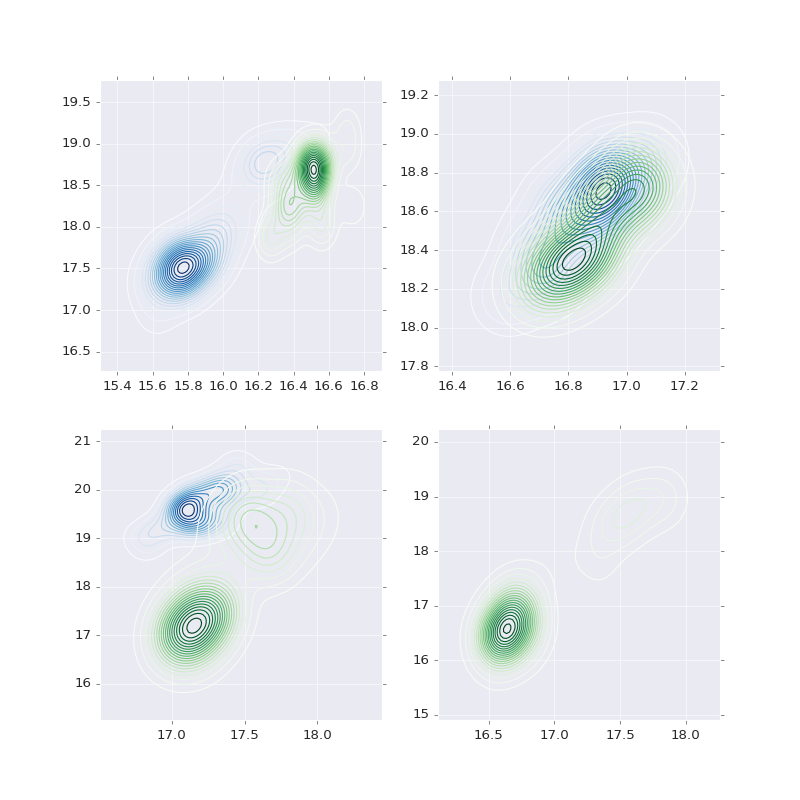

In [7]:
MyTags  = [
    ['cWza', 'conformation0'],
    ['cWza', 'conformation1'],
    ['cWza-K375C', 'conformation0'],
    ['cWza-K375C', 'conformation1'],
    ['cWza-S355C', 'conformation0'],
    ['cWza-S355C', 'conformation1'],
    ['cWza-Y373C', 'conformation1']
]

CONFORMATIONS = {
    'cWza':['conformation0', 'conformation1'],
    'cWza-K375C':['conformation0', 'conformation1'],
    'cWza-S355C':['conformation0', 'conformation1'],
    'cWza-Y373C':['conformation1'],
}

fig, ax = plt.subplots(2,2,figsize=(10,10))
seaborn.set_style('darkgrid')

axes = {
    'cWza':ax[0,0],
    'cWza-K375C':ax[0,1],
    'cWza-S355C':ax[1,0],
    'cWza-Y373C':ax[1,1]
}

CMAPS = {
    'conformation0':'Blues',
    'conformation1':'Greens'
}

for tag in MyTags:
    mutant, C = tag
    X = []; Z = []
    for i in range(len(Sample)):
        model_dir = Sample[i]
        mutant_sample, C_sample, model_name = model_dir.split('/')
        comparison = [mutant_sample, C_sample] == tag
        if comparison:
            model_pdb = wd+model_dir+'/'+model_name+'.pdb'
            Rg_x, Rg_y, Rg_z = get_Rg_components(model_pdb)
            X.append(Rg_x)
            Z.append(Rg_z)
    seaborn.kdeplot(X,Z,n_levels=20,cmap=CMAPS[C],ax=axes[mutant])

plt.show()

## MD Protein frames: Sample classified models

### Generate Protein frames for all Sample MD trajectories

NOTES:

* Had to modify time length of trajectory to analyse (`0-100000 # (=100ns) ps`)
* Also, modified timestep of frames for extraction (`dt=100 # ps`)

**FIRST**: Remove old frames folder and back-up files

```bash
cat EMMD_Sample.txt | awk '{system("rm -r "$1"/complex/mdf/md_100ns")}'                               

cat EMMD_Sample.txt | awk '{system("rm -r "$1"/complex/mdf/md_100ns/#Protein*")}'
```

**SECOND**: Re-do frame extraction for increase sampling 
```bash
nohup python parallel_protein_extraction_urmd.py 20 EMMD_Sample.json > parallel_protein_extraction_urmd.out &
```

### Extract Radius of Gyration for frames

In [16]:
func = get_Rg_components

param_list = []
for i in range(100):
    model_pdb = path0+'Protein_'+str(i)+'.pdb'
    param_list.append(model_pdb)

NameError: name 'path0' is not defined

In [ ]:
import concurrent.futures     
n_threads = 10

data = []

with concurrent.futures.ProcessPoolExecutor(max_workers = n_threads) as executor:
    out = executor.map(func, param_list)
    data.append(out)

In [ ]:
output = list(data[0])